Verificando informações referentes aos dados de nascimentos dos animais por linhagem

In [145]:
#Importando bibliotecas necessárias para a análise.

import matplotlib.pyplot as plt 
import pandas as pd 
import os
import seaborn as sns
# import numpy as np
from statsmodels.tsa.arima_model import ARIMA
#Paramentros para os gráficos
plt.rcParams.update({'font.size': 15}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 15 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 15 #tamanho da fonte

In [146]:
#Filtros para trabalhar com os dados da minha dataframe original

nume_ani = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
nume_ani = nume_ani[(nume_ani['num_ani'] < 200) 
                    & (nume_ani['util'] == 'nasc')
                    & (nume_ani['ling'] != 'Test')]
 #descarte[(descarte['obs_desc'] != 'AAA')
                   


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    nume_ani[d] = pd.to_datetime(nume_ani[d], unit = 's')
    
nume_ani.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [147]:
#numero total de animais por nascimento
nume_ani['num_ani'].sum()

15106

In [148]:
#numero total de eventos de nascimento
len(nume_ani)

1808

In [149]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

nume_ani['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

nume_ani['ling'].replace(' S129KO', 'S129KO', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

nume_ani['ling'].replace(['C57BL06WT','C57BL06WT\t'], 'C57BL/6', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

nume_ani['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

nume_ani['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

nume_ani['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

nume_ani['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

nume_ani['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

nume_ani['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)

In [150]:
nume_ani['ling'].value_counts()

Balb/c       498
C57BL/6      460
S129KO       250
129/SV-E     149
C3H          102
Swiss-1 A     48
Swiss-1 E     47
Swiss-1 C     38
Swiss-1 B     36
Swiss-1 D     33
Swiss-2 C     27
Swiss-2 B     24
DBA/1J        24
Swiss-2 E     21
Swiss-2 A     21
Swiss-2 D     21
AG129          9
Name: ling, dtype: int64

In [151]:
l = nume_ani.groupby('ling')
l.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,905,99234,99234,99234,99234,99234,99234,155,228,905,81345,72034,99234,99234
AG129,43,5994,5994,5994,5994,5994,5994,9,9,43,5332,4003,5994,5994
Balb/c,4289,331668,331668,331668,331668,331668,331668,498,802,4289,256073,236898,331668,331668
C3H,603,67932,67932,67932,67932,67932,67932,102,119,603,54003,53996,67932,67932
C57BL/6,4001,306360,306360,306360,306360,306360,306360,462,779,4001,258681,231501,306360,306360
DBA/1J,230,15984,15984,15984,15984,15984,15984,24,47,230,15984,15984,15984,15984
S129KO,1612,166500,166500,166500,166500,166500,166500,252,422,1612,134025,136660,166500,166500
Swiss-1 A,515,31968,31968,31968,31968,31968,31968,48,62,515,27992,28657,31968,31968
Swiss-1 B,381,23976,23976,23976,23976,23976,23976,36,49,381,20001,20000,23976,23976


+++++++++++++++++++++++++++++++ Calculo de media e mediana para printar no gráfico as faixas verde e vermelha +++++++++++++++++++++++++++++++++++++++

In [152]:
#Calculo pra plotar mediana

mediana = nume_ani.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
mediana = round(mediana['num_ani'].sum().median(),2)    #Somando o numero total de animas e pedidndo a mediana
mediana

381.0

In [153]:
#Calculo pra plotar média

media_g = nume_ani.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
media = round(media_g['num_ani'].sum().mean(),2)        #Somando o numero total de animais e calculando a média
media                                                   #função .round() serve para arredondar

888.59

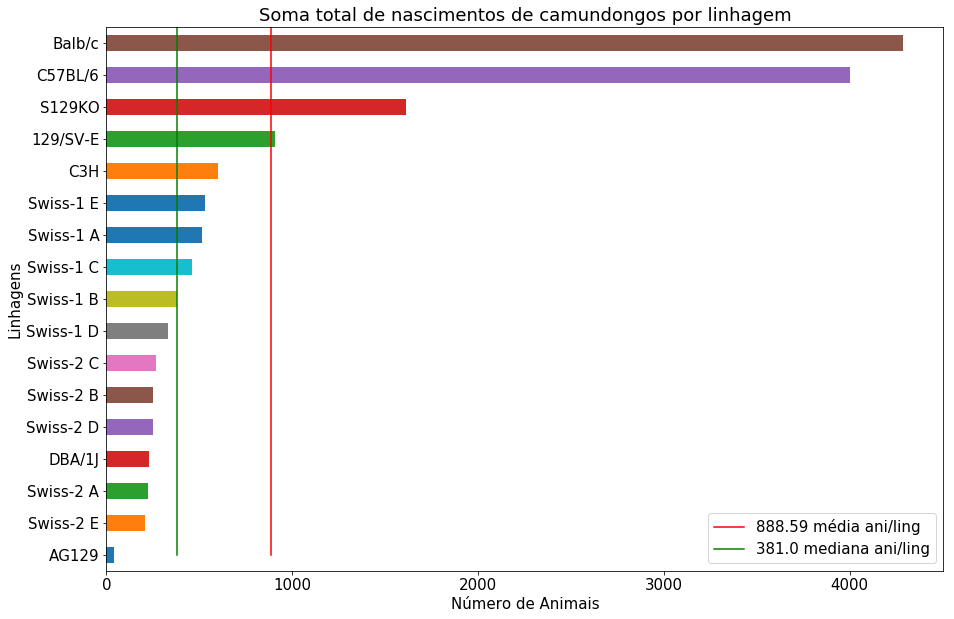

In [154]:
#Gráfico com o total de animais

plt.figure(figsize=(15,10)) #tamanho do gráfico
plt.title('Soma total de nascimentos de camundongos por linhagem') #título do gráfico

plot = nume_ani.groupby('ling') #pedindo pra agrupar por linhagem
plot['num_ani'].sum().sort_values(ascending=True).plot( #plotando a soma de animais e ordenando do maior para o menor
kind='barh'
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando as faixas de média e mediana

plt.plot( #função para plotar o gráfico
    [media, media], #faixa que marca a média
    [len(nume_ani.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana,mediana], #faixa que marca a mediana
    [len(nume_ani.index), 0], 
    c='green' #cor verde da faixa
)

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#configurações do gráfico

plt.legend([str(media) + ' média ani/ling', str(mediana) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#plt.annotate()

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando o gráfico

plt.savefig(
    fname="../resultados/17-numero_total_animais.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)


Text(0, 0.5, 'Eventos de nascimento')

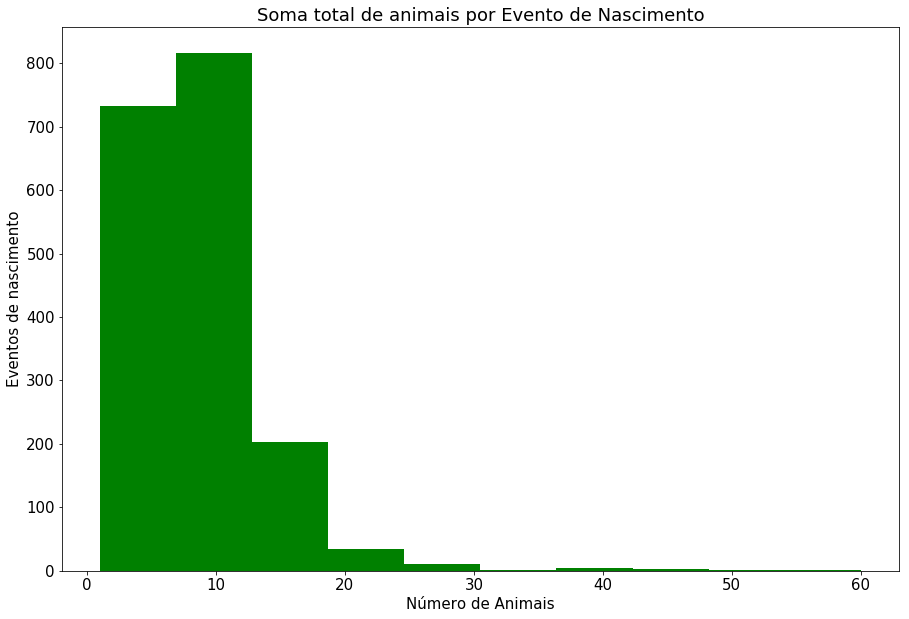

In [155]:
plt.figure(figsize=(15,10))
plt.title('Soma total de animais por Evento de Nascimento')

test = nume_ani['num_ani'].plot(
kind = 'hist',
color='green',
    bins = 10
)

plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Eventos de nascimento') #definindo nome do eixo Y

/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


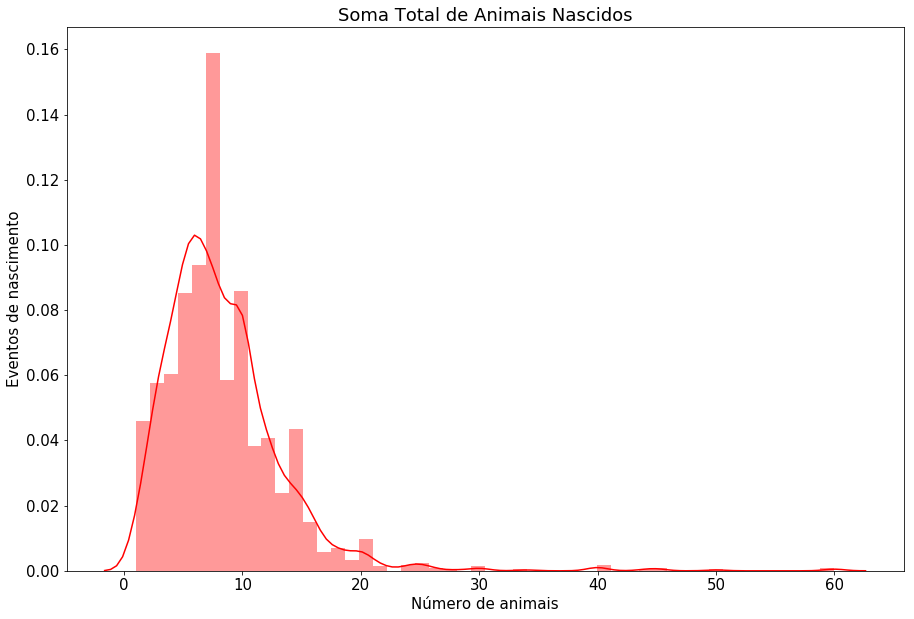

In [156]:
plt.figure(figsize=(15,10))                         #tamanho do gráfico


plot_his = sns.distplot(nume_ani['num_ani'],        #distplot - função usada para plotar curva em um gráfico do tipo histograma - seleciono minha série da Dataframe
                        hist = True,                #printando o histograma
                        kde = True,                 #deixando a curva presente
                        color='red',                #cor,
                        label = 'N° de animais')      #legenda das barras (que sei la pq não funciona)

# Plot formatting
plt.title('Soma Total de Animais Nascidos')
plt.xlabel('Número de animais')
plt.ylabel('Eventos de nascimento')
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando o gráfico

plt.savefig(
    fname="../resultados/17-numero_total_animais_histo.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

++++++++++++++++++++++++++++++++++ Calculando media e mediana a partir das medianas dos dados. +++++++++++++++++++++++++++++++++++++++++++++++

In [157]:
media_plot = nume_ani.groupby('ling')                       #agrupando por linhagem e guardando na variável
calcu_mediana = round(media_plot['num_ani'].median(), 2)  #calculando a mediana de cada linhagem para plotar traço no gráfico
media_grafico = round(calcu_mediana.mean(), 2)                #Calculando a media das minhas medianas
media_grafico

8.82

In [158]:
mediana_plot = nume_ani.groupby('ling')                 #agrupando por linhagem e guardando na variável
mediana_grafico = calcu_mediana.median()                #Calculando a mediana da mediana que já foi estabelecida na célula acima
mediana_grafico

10.0

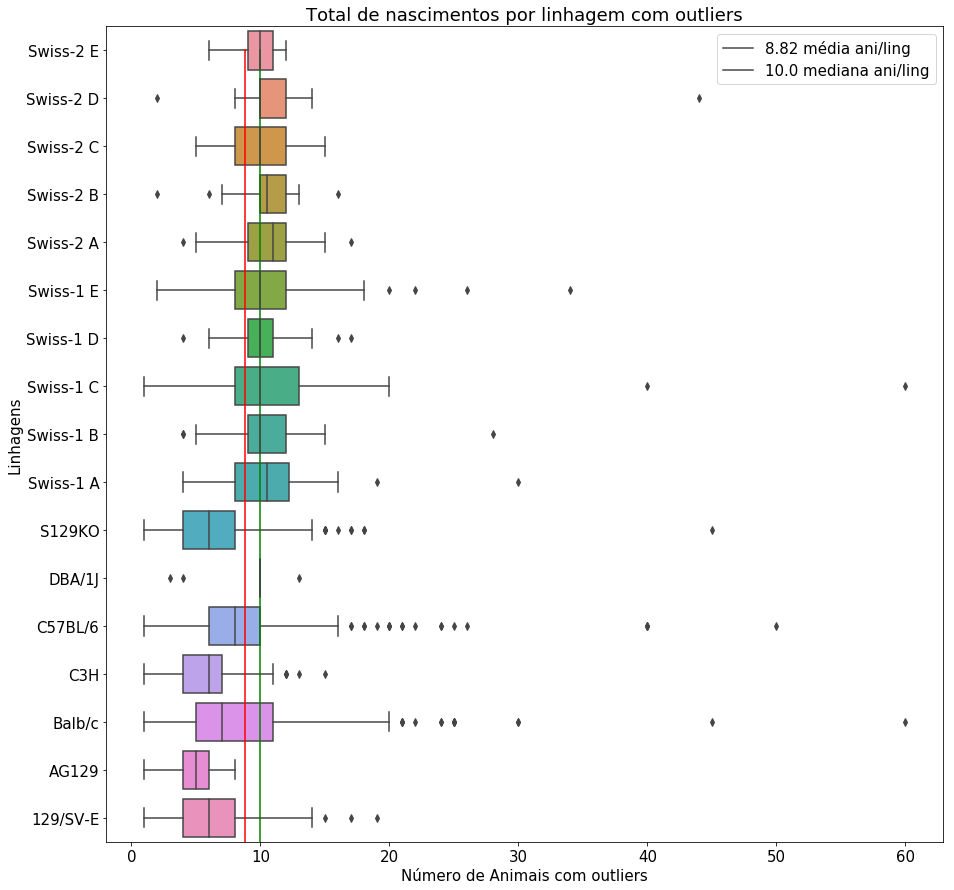

In [159]:
#Valores discrepantes do numero de nascimentos de animais - Dados com outliers

plt.figure(figsize=(15,15))
plt.title('Total de nascimentos por linhagem com outliers')
sns.boxplot(
    
    y='ling',
    x='num_nasc',
#     hue='ling',
    data=nume_ani.sort_values(by='ling', ascending=False)
)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Plotagem de faixas (média e mediana)

plt.plot( #função para plotar o gráfico
    [media_grafico, media_grafico], #faixa que marca a média
    [len(nume_ani.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_grafico, mediana_grafico], #faixa que marca a mediana
    [len(nume_ani.index), 0], 
    c='green' #cor verde da faixa
)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando informações de legendas

plt.legend([str(media_grafico) + ' média ani/ling', str(mediana_grafico) + ' mediana ani/ling'])
plt.xlabel('Número de Animais com outliers') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y

plt.savefig(
    fname="../resultados/17-numero_total_animais_boxplot.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

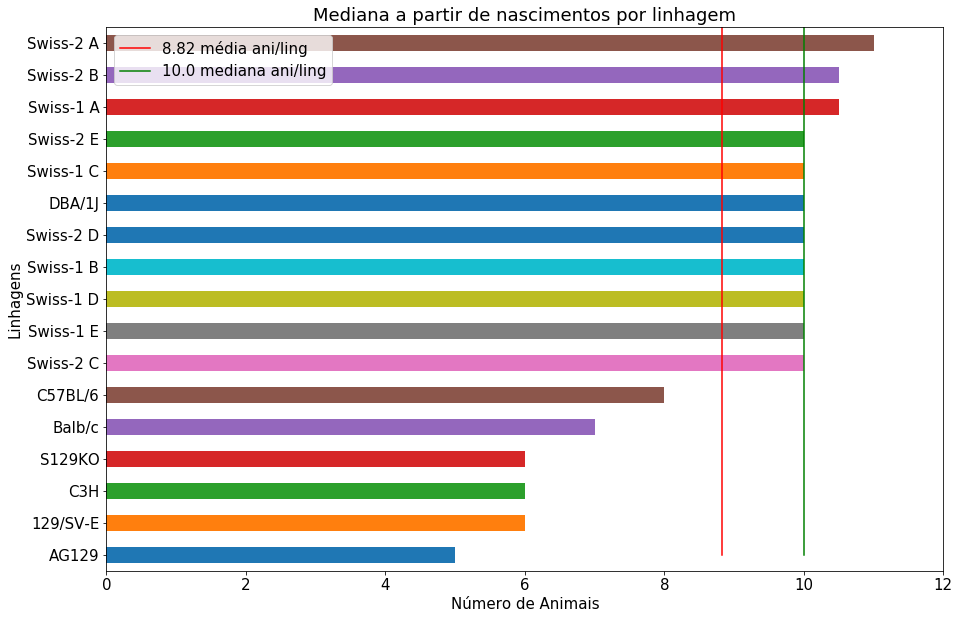

In [160]:
# Plotando Gráfico de medianas referente a todos animais produzidos por linhagem


plt.figure(figsize=(15,10))
plt.title('Mediana a partir de nascimentos por linhagem')

plot = nume_ani.groupby('ling')
plot['num_ani'].median().sort_values(ascending=True).plot(
kind='barh',
     xlim=(0,12) #arrumando a escala do gráfico de 0 a 12
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Plotagem de faixas (média e mediana)

plt.plot( #função para plotar o gráfico
    [media_grafico, media_grafico], #faixa que marca a média
    [len(nume_ani.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_grafico, mediana_grafico], #faixa que marca a mediana
    [len(nume_ani.index), 0], 
    c='green' #cor verde da faixa
)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando gráfico com legendas

plt.legend([str(media_grafico) + ' média ani/ling', str(mediana_grafico) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-numero_mediana_animais.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)



Verificando os outliers pelo gráfico de Boxplot

++++++++++++++++++++++++++++++++++++++++++ Calculando mediana a partir do grupo isogênico +++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [161]:
ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129']

g_iso = nume_ani[nume_ani['ling'].isin(ling_iso)].groupby('ling')
linhagens_iso = g_iso.mean()
linhagens_iso

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,6.073826,666.0,666.0,666.0,666.0,666.0,666.0,1.040268,1.530201,6.073826,545.939597,483.449664,666.0,666.0
AG129,4.777778,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.000000,4.777778,592.444444,444.777778,666.0,666.0
Balb/c,8.612450,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.610442,8.612450,514.202811,475.698795,666.0,666.0
C3H,5.911765,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.166667,5.911765,529.441176,529.372549,666.0,666.0
C57BL/6,8.697826,666.0,666.0,666.0,666.0,666.0,666.0,1.004348,1.693478,8.697826,562.350000,503.263043,666.0,666.0
DBA/1J,9.583333,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.958333,9.583333,666.000000,666.000000,666.0,666.0
S129KO,6.448000,666.0,666.0,666.0,666.0,666.0,666.0,1.008000,1.688000,6.448000,536.100000,546.640000,666.0,666.0


In [162]:
media_iso = round(linhagens_iso['num_ani'].mean(),2)
media_iso

7.16

In [163]:
mediana_iso = round(linhagens_iso['num_ani'].median(),2)
mediana_iso

6.45

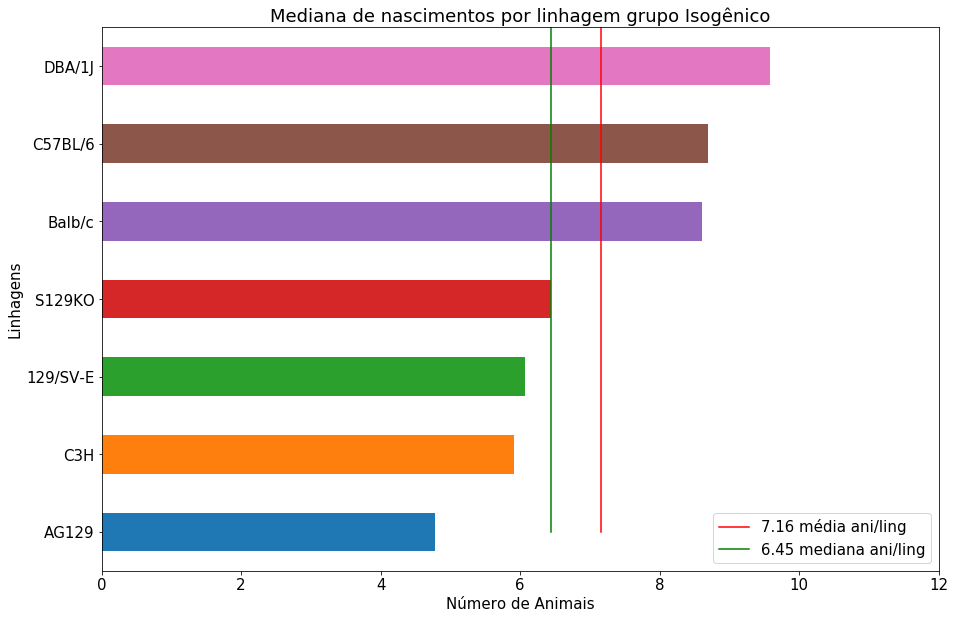

In [164]:
#Gráfico plotando é mediana por grupo: Isogênico

plt.figure(figsize=(15,10))
plt.title('Mediana de nascimentos por linhagem grupo Isogênico')

plot = linhagens_iso.groupby('ling')
plot['num_ani'].mean().sort_values(ascending=True).plot(
kind='barh',
    xlim=(0,12) #arrumando a escala do gráfico de 0 a 12

)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_iso, media_iso], #faixa que marca a média
    [len(nume_ani.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_iso, mediana_iso], #faixa que marca a mediana
    [len(nume_ani.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_iso) + ' média ani/ling', str(mediana_iso) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-numero_media_isogenicos.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

+++++++++++++++++++++++++++++++++++++++++++++ Calculando a mediana por grupo Heterogênico +++++++++++++++++++++++++++++++++++++++++++++++++++

In [165]:
ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 B','Swiss-2 C','Swiss-2 D','Swiss-2 E']  

g_het = nume_ani[nume_ani['ling'].isin(ling_het)].groupby('ling')
linhagens_het = g_het.mean()
linhagens_het

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
Swiss-1 A,10.729167,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.291667,10.729167,583.166667,597.020833,666.0,666.0
Swiss-1 B,10.583333,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.361111,10.583333,555.583333,555.555556,666.0,666.0
Swiss-1 C,12.157895,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.447368,12.157895,526.473684,578.921053,666.0,666.0
Swiss-1 D,10.090909,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.393939,10.090909,525.515152,605.727273,666.0,666.0
Swiss-1 E,11.297872,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.446809,11.297872,623.765957,567.382979,666.0,666.0
Swiss-2 A,10.761905,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.047619,10.761905,602.809524,539.714286,666.0,666.0
Swiss-2 B,10.500000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.000000,10.500000,583.125000,500.125000,666.0,666.0
Swiss-2 C,9.851852,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.185185,9.851852,616.962963,518.592593,666.0,666.0
Swiss-2 D,11.857143,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.000000,11.857143,508.190476,571.476190,666.0,666.0


In [166]:
mediana_het = round(linhagens_het['num_ani'].median(),2)
mediana_het

10.66

In [167]:
media_het = round(linhagens_het['num_ani'].mean(),2)
media_het

10.77

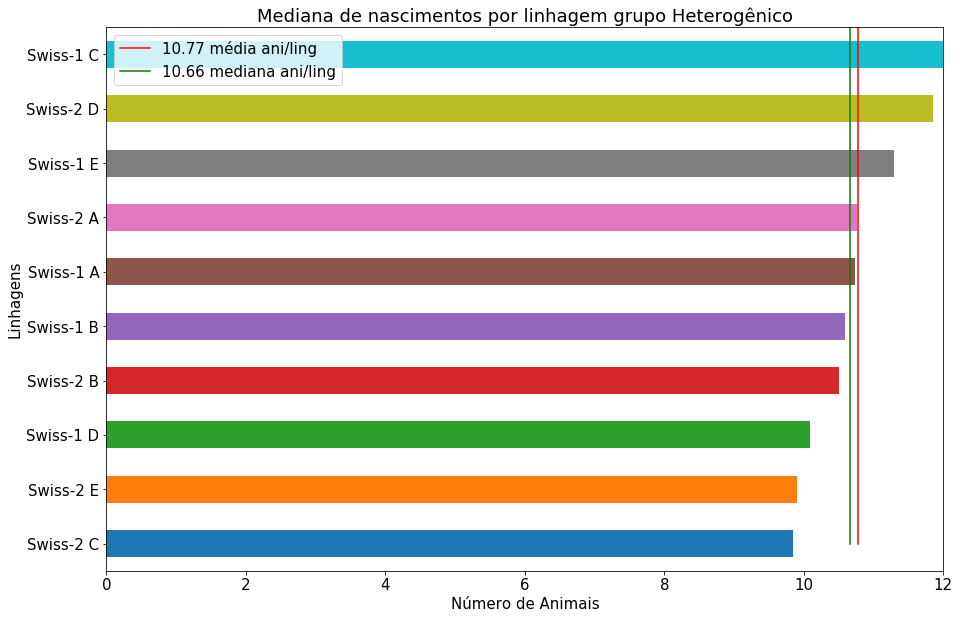

In [168]:
#Gráfico plotando é mediana por grupo: Isogênico

plt.figure(figsize=(15,10))
plt.title('Mediana de nascimentos por linhagem grupo Heterogênico')

plot = linhagens_het.groupby('ling')
plot['num_ani'].mean().sort_values(ascending=True).plot(
kind='barh',
     xlim=(0,12) #arrumando a escala do gráfico de 0 a 12

)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_het, media_het], #faixa que marca a média
    [len(nume_ani.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_het, mediana_het], #faixa que marca a mediana
    [len(nume_ani.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_het) + ' média ani/ling', str(mediana_het) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-numero_media_heterogenicos.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RETIRANDO OS OUTLIERS DOS DADOS

In [169]:
#Criando uma nova Dataframe, filtrando os valores discrepantes
q1 = nume_ani['num_ani'].quantile(0.25)
q3 = nume_ani['num_ani'].quantile(0.75)
iqr = q3 - q1

sem_out = nume_ani[(nume_ani['num_ani'] > (q1 - 1.5 * iqr)) & (nume_ani['num_ani'] < (q3 + 1.5 * iqr))]#dataframe
sem_out.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss-1 E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
122,2014-09-23 18:13:24,Tania,Swiss-1 D,10,AAA,1970-01-01 00:11:06,58,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:26:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA
123,2014-09-23 18:13:24,Tania,Swiss-1 B,10,AAA,1970-01-01 00:11:06,60,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:38:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA


In [170]:
#conferindo a mediana dos dados sem outliers
test_g= sem_out.groupby('ling')
test_g.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,886,98568,98568,98568,98568,98568,98568,154,225,886,80679,71368,98568,98568
AG129,43,5994,5994,5994,5994,5994,5994,9,9,43,5332,4003,5994,5994
Balb/c,3452,307026,307026,307026,307026,307026,307026,461,734,3452,234084,219538,307026,307026
C3H,603,67932,67932,67932,67932,67932,67932,102,119,603,54003,53996,67932,67932
C57BL/6,3553,295038,295038,295038,295038,295038,295038,445,743,3553,249343,223490,295038,295038
DBA/1J,230,15984,15984,15984,15984,15984,15984,24,47,230,15984,15984,15984,15984
S129KO,1531,164502,164502,164502,164502,164502,164502,249,416,1531,132689,134662,164502,164502
Swiss-1 A,466,30636,30636,30636,30636,30636,30636,46,56,466,26660,27325,30636,30636
Swiss-1 B,353,23310,23310,23310,23310,23310,23310,35,46,353,19335,19334,23310,23310


+++++++++++++++++++++++++++++++++++ Calculando média e mediana para plotar traços no gráfico ++++++++++++++++++++++++++++++++++++++++++++++++

In [171]:
mediana_g = sem_out.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
mediana = round(mediana_g['num_ani'].sum().median(),2)    #Somando o numero total de animas e pedidndo a mediana
mediana

333.0

In [172]:
media_g = sem_out.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
media = round(media_g['num_ani'].sum().mean(),2)        #Somando o numero total de animais e calculando a média
media                                                   #função .round() serve para arredondar

783.71

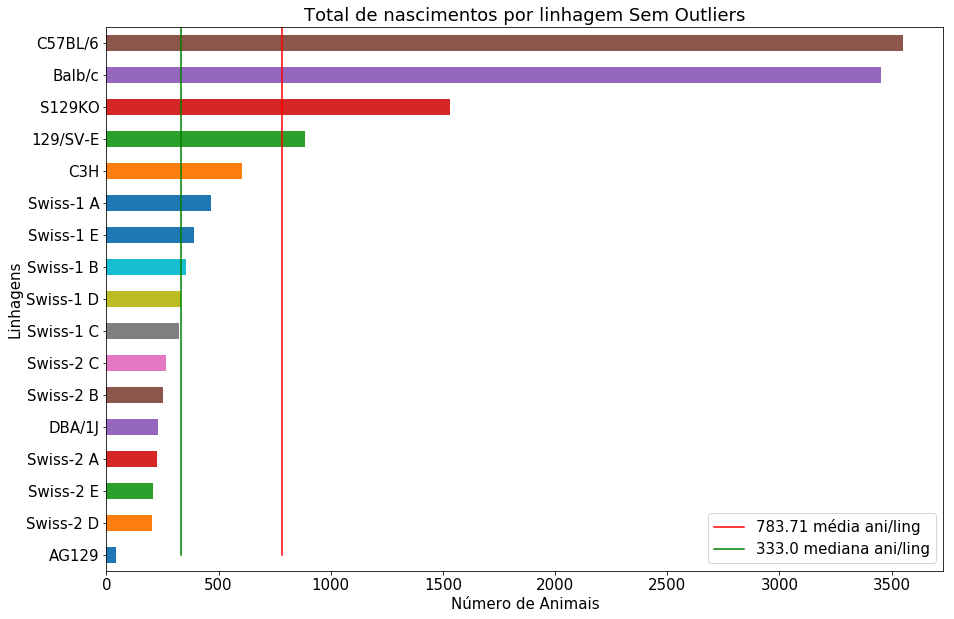

In [173]:
#Gráfico total de animais com a retirada de outliers

plt.figure(figsize=(15,10))
plt.title('Total de nascimentos por linhagem Sem Outliers')

#Calculando a retirada de outliers

plot = sem_out.groupby('ling')
plot['num_ani'].sum().sort_values(ascending=True).plot(
kind='barh'
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media, media], #faixa que marca a média
    [len(sem_out.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana,mediana], #faixa que marca a mediana
    [len(sem_out.index), 0], 
    c='green' #cor verde da faixa
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando legendas do gráfico

plt.legend([str(media) + ' média ani/ling', str(mediana) + ' mediana ani/ling'])

plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-mediatotal_semoutliers.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


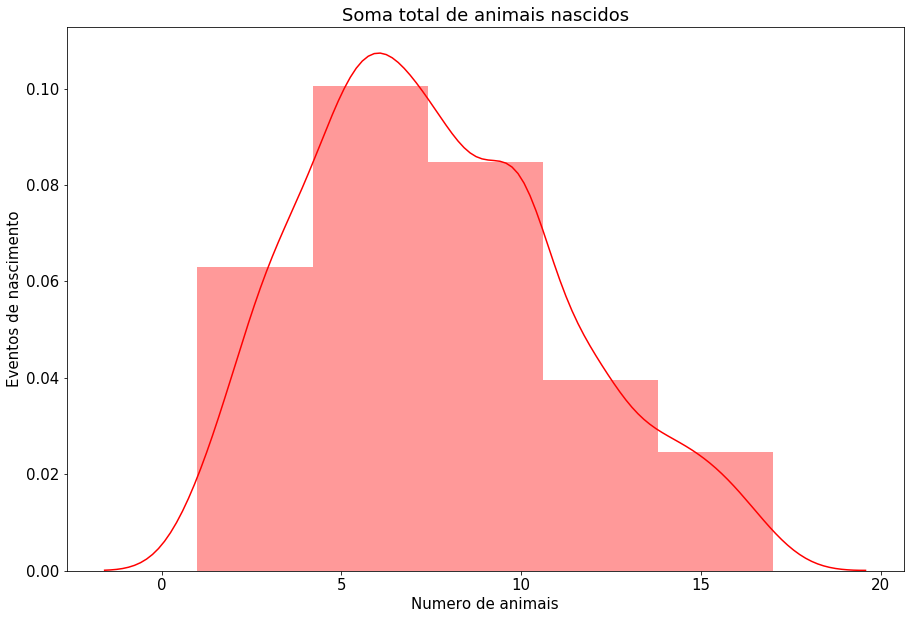

In [174]:
plt.figure(figsize=(15,10))


plot_his = sns.distplot(sem_out['num_ani'], 
                        hist = True, 
                        kde = True, 
                        label='n° de animais', 
                        color = 'red', bins=5)

# Plot formatting
plt.title('Soma total de animais nascidos')
plt.xlabel('Numero de animais')
plt.ylabel('Eventos de nascimento')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-histograma_semoutliers.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Text(0, 0.5, 'Eventos de nascimento')

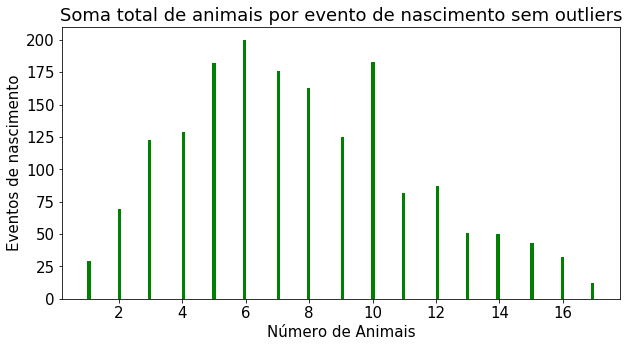

In [175]:
plt.figure(figsize=(10,5))
plt.title('Soma total de animais por evento de nascimento sem outliers')

test = sem_out['num_ani'].plot(
kind = 'hist',
color='green',
    bins=150
)

plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Eventos de nascimento') #definindo nome do eixo Y

+++++++++++++++++++++++++++++++++++ Calculando média e mediana a partir das minhas medianas sem outliers +++++++++++++++++++++++++++++++++++++++++

In [176]:
media_group = sem_out.groupby('ling')                           #Agrupando minha DataFrame por linhagem
mediana_s_out = round(media_group['num_ani'].median(),2)        #Pegando as medianas da coluna 'num_ani', arredondando e guardando numa variável
media_grafico = round(mediana_s_out.mean(),2)                     #Calculando a média das minhas medianas e guardando em outra variável
media_grafico

8.71

In [177]:
mediana_group = sem_out.groupby('ling')                 #agrupando por linhagem e guardando na variável
mediana_grafico = mediana_s_out.median()                #Calculando a mediana da mediana que já foi estabelecida na célula acima (mediana_s_out)
mediana_grafico

10.0

Plotando boxplot depois da retirada dos outliers

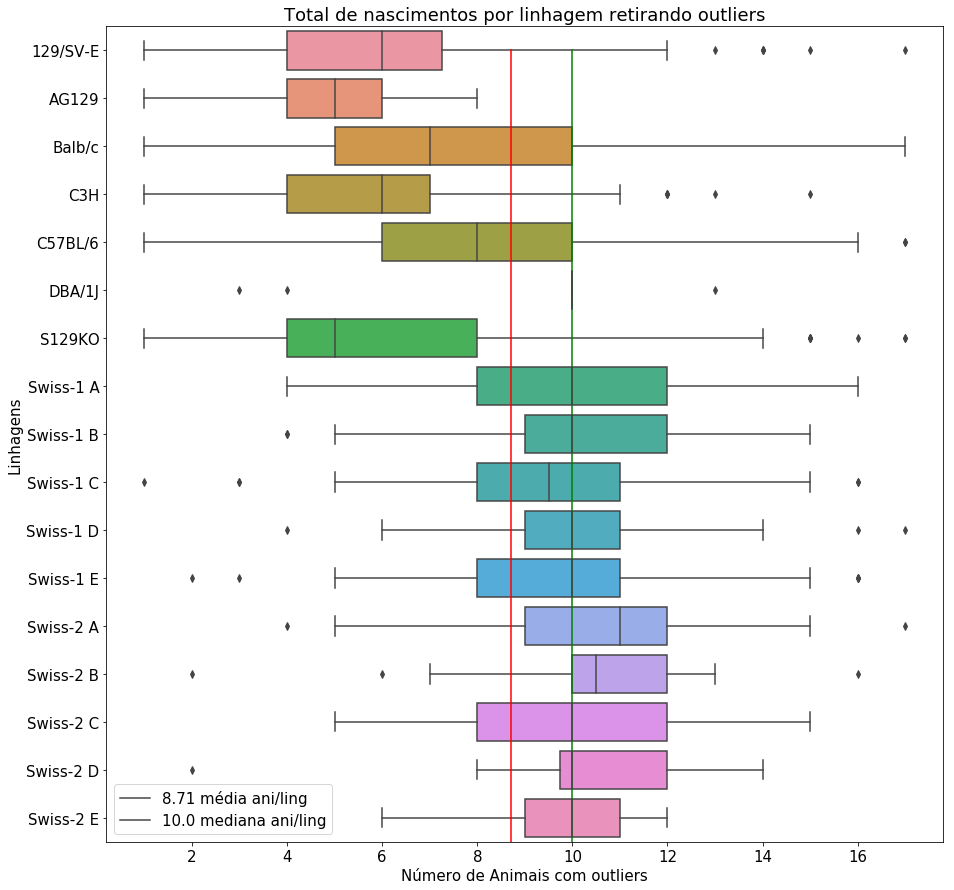

In [178]:
#Bloxplot com a retirada de outliers

plt.figure(figsize=(15,15))
plt.title('Total de nascimentos por linhagem retirando outliers')
sns.boxplot(
    
    y='ling',
    x='num_nasc',
#     hue='ling',
    data=sem_out.sort_values('ling')
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_grafico, media_grafico], #faixa que marca a média
    [len(nume_ani.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_grafico, mediana_grafico], #faixa que marca a mediana
    [len(nume_ani.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_grafico) + ' média ani/ling', str(mediana_grafico) + ' mediana ani/ling'])
plt.xlabel('Número de Animais com outliers') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-boxplot_semoutliers.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Mediana para todas as linhagens - calculo dos traços são os mesmos de acima

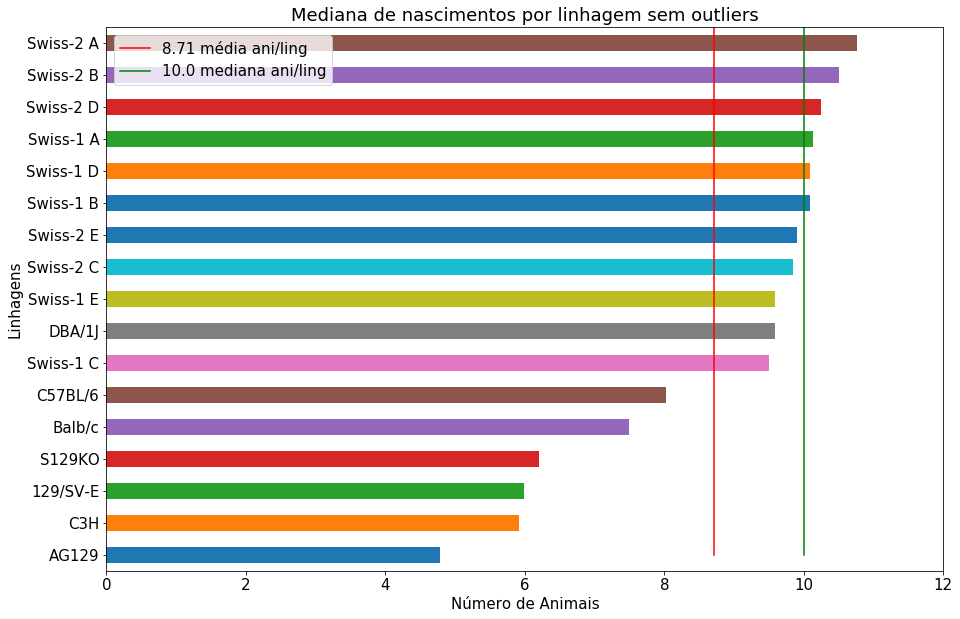

In [179]:
#Gráfico referente a todos animais produzidos por linhagem


plt.figure(figsize=(15,10))
plt.title('Mediana de nascimentos por linhagem sem outliers')

plot = sem_out.groupby('ling')
plot['num_ani'].mean().sort_values(ascending=True).plot(
kind='barh',
     xlim=(0,12) #arrumando a escala do gráfico de 0 a 12
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_grafico, media_grafico], #faixa que marca a média
    [len(sem_out.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_grafico, mediana_grafico], #faixa que marca a mediana
    [len(sem_out.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_grafico) + ' média ani/ling', str(mediana_grafico) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-mediana_semoutliers.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

+++++++++++++++++++++++++++++++++++++++++++++ Calculando a mediana por grupo Isogênico +++++++++++++++++++++++++++++++++++++++++++++++++++

In [180]:
ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129']

g_iso = sem_out[sem_out['ling'].isin(ling_iso)].groupby('ling')
linhagens_iso = g_iso.mean()
linhagens_iso

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,5.986486,666.0,666.0,666.0,666.0,666.0,666.0,1.040541,1.520270,5.986486,545.128378,482.216216,666.0,666.0
AG129,4.777778,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.000000,4.777778,592.444444,444.777778,666.0,666.0
Balb/c,7.488069,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.592191,7.488069,507.774403,476.221258,666.0,666.0
C3H,5.911765,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.166667,5.911765,529.441176,529.372549,666.0,666.0
C57BL/6,8.020316,666.0,666.0,666.0,666.0,666.0,666.0,1.004515,1.677201,8.020316,562.851016,504.492099,666.0,666.0
DBA/1J,9.583333,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.958333,9.583333,666.000000,666.000000,666.0,666.0
S129KO,6.198381,666.0,666.0,666.0,666.0,666.0,666.0,1.008097,1.684211,6.198381,537.202429,545.190283,666.0,666.0


In [181]:
mediana_iso = round(linhagens_iso['num_ani'].median(),2)
mediana_iso

6.2

In [182]:
media_iso = round(linhagens_iso['num_ani'].mean(),2)
media_iso

6.85

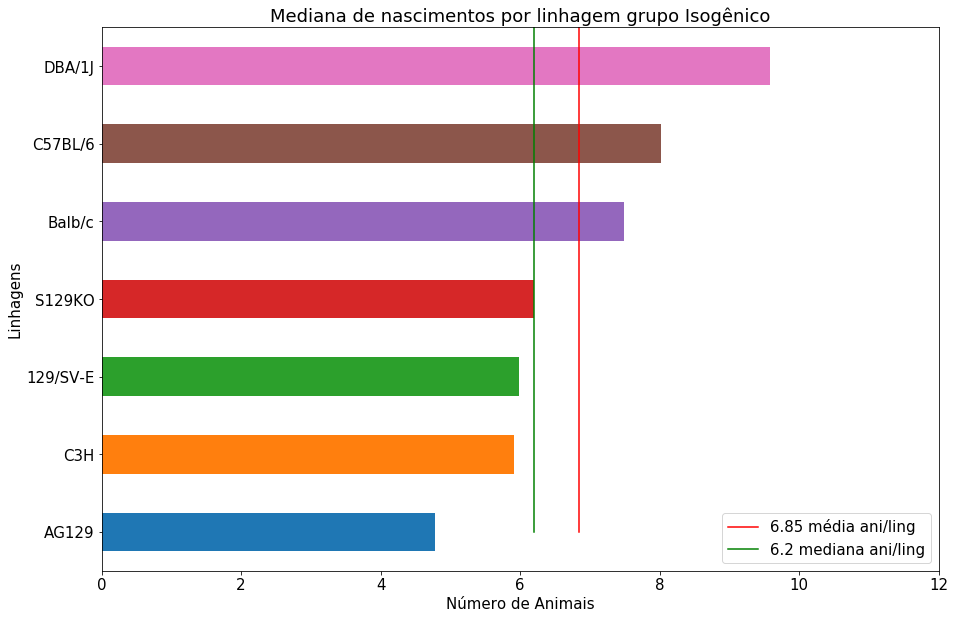

In [183]:
#Gráfico plotando é mediana por grupo: Isogênico

plt.figure(figsize=(15,10))
plt.title('Mediana de nascimentos por linhagem grupo Isogênico')

plot = linhagens_iso.groupby('ling')
plot['num_ani'].mean().sort_values(ascending=True).plot(
kind='barh',
     xlim=(0,12) #arrumando a escala do gráfico de 0 a 12
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_iso, media_iso], #faixa que marca a média
    [len(sem_out.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_iso, mediana_iso], #faixa que marca a mediana
    [len(sem_out.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_iso) + ' média ani/ling', str(mediana_iso) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-isogenico_semoutliers.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

+++++++++++++++++++++++++++++++++++++++++++++ Calculando a mediana por grupo Heterogênico +++++++++++++++++++++++++++++++++++++++++++++++++++

In [184]:
ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 B','Swiss-2 C','Swiss-2 D','Swiss-2 E']  

g_het = sem_out[sem_out['ling'].isin(ling_het)].groupby('ling')
linhagens_het = g_het.mean()
linhagens_het

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
Swiss-1 A,10.130435,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.217391,10.130435,579.565217,594.021739,666.0,666.0
Swiss-1 B,10.085714,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.314286,10.085714,552.428571,552.400000,666.0,666.0
Swiss-1 C,9.500000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.352941,9.500000,529.558824,568.676471,666.0,666.0
Swiss-1 D,10.090909,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.393939,10.090909,525.515152,605.727273,666.0,666.0
Swiss-1 E,9.585366,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.365854,9.585366,617.585366,552.951220,666.0,666.0
Swiss-2 A,10.761905,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.047619,10.761905,602.809524,539.714286,666.0,666.0
Swiss-2 B,10.500000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.000000,10.500000,583.125000,500.125000,666.0,666.0
Swiss-2 C,9.851852,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.185185,9.851852,616.962963,518.592593,666.0,666.0
Swiss-2 D,10.250000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.000000,10.250000,500.300000,599.850000,666.0,666.0


In [185]:
mediana_het = round(linhagens_het['num_ani'].median(),2)
mediana_het

10.09

In [186]:
media_het = round(linhagens_het['num_ani'].mean(),2)
media_het

10.07

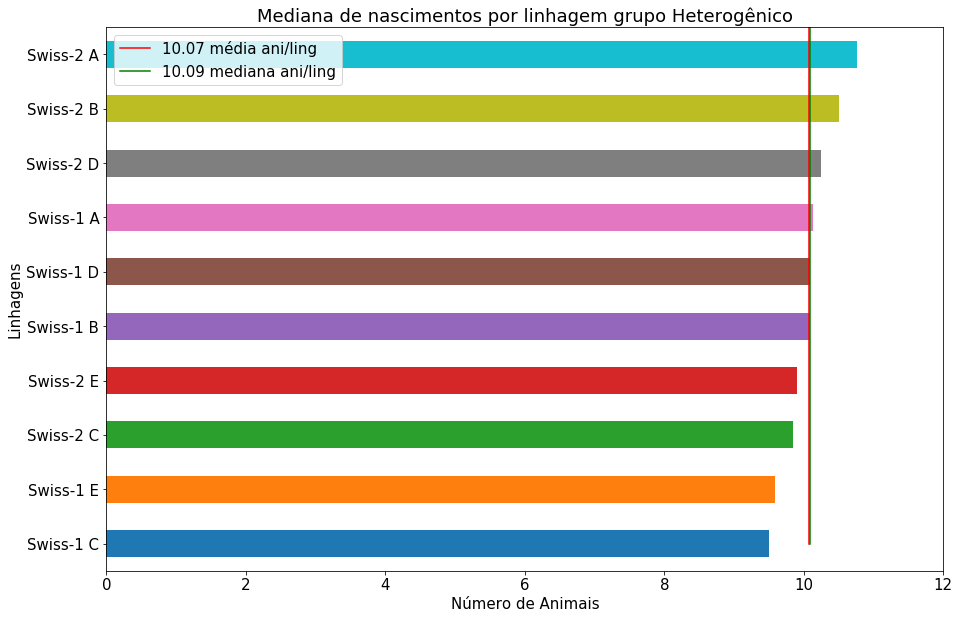

In [187]:
#Gráfico plotando é mediana por grupo: Isogênico

plt.figure(figsize=(15,10))
plt.title('Mediana de nascimentos por linhagem grupo Heterogênico')

plot = linhagens_het.groupby('ling')
plot['num_ani'].mean().sort_values(ascending=True).plot(
kind='barh',
     xlim=(0,12) #arrumando a escala do gráfico de 0 a 12
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_het, media_het], #faixa que marca a média
    [len(sem_out.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_het, mediana_het], #faixa que marca a mediana
    [len(sem_out.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_het) + ' média ani/ling', str(mediana_het) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-heterogenico_semoutliers.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [188]:
# #tentando plotar um gráfico de pizza
# ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
#            'Swiss-2 A','Swiss-2 B','Swiss-2 C','Swiss-2 D','Swiss-2 E']  

# pizza = sem_out[sem_out['ling'].isin(ling_het)].groupby('ling')
# pizza_het = pizza.sum()
# pizza_het['ling'] = 'Grupo Heterogênico'
# pizza_het['num_ani'] = pizza_het['num_ani'].sum()
# pizza_het

In [189]:
# plt.figure(figsize=(15,10))
# plt.title('Mediana de nascimentos por linhagem grupo Heterogênico')

# plot = pizza_het.groupby('ling')
# plot['num_ani'].mean().sort_values(ascending=True).plot(
# kind='pie'
# )

++++++++++++++++++++++++++++++++++++++++++++++++++++ SERIES TEMPORAIS +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [190]:
#Criando um Dataframe pra plotar minhas séries temporais:

serie_temp_ling = pd.DataFrame(sem_out['date_hoje'])
serie_temp_ling['ling'] = sem_out['ling'] #criação da DataFrame "tirar_ling com a coluna de data"
serie_temp_ling['num_ani'] = sem_out['num_ani']#criação de coluna(serie_temp) que estará inserida na DataFrame
serie_temp_ling = serie_temp_ling.set_index('date_hoje') #identificando a nova coluna como index data_hoje
serie_temp_ling.head()

,ling,num_ani
date_hoje,,
2014-09-23 17:40:33,Swiss-1 E,5
2014-09-23 17:40:33,Swiss-1 E,10
2014-09-23 17:40:47,Swiss-1 E,10
2014-09-23 18:13:24,Swiss-1 D,10
2014-09-23 18:13:24,Swiss-1 B,10


In [191]:
#Salvando minha DataFrame em csv para exportar e trabalhar em outro arquivo.
serie_temp_ling.to_csv('../tabelas_test/serie_temp_ling.csv')

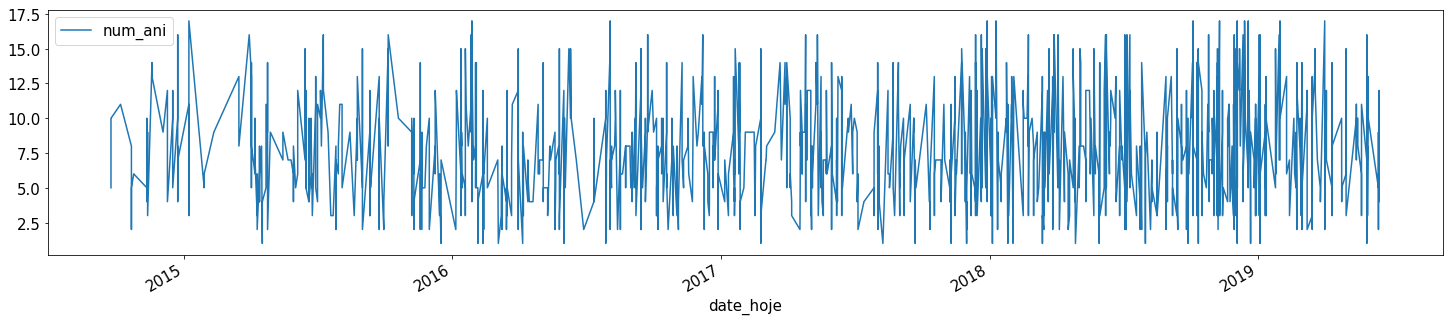

In [192]:
#Plotando numero de animais produzidos por ano.
serie_temp_ling.plot(

figsize=(25,5)
)


In [193]:
#Biblioteca com frunções para trabalhar series temporais
from statsmodels.tsa.seasonal import seasonal_decompose

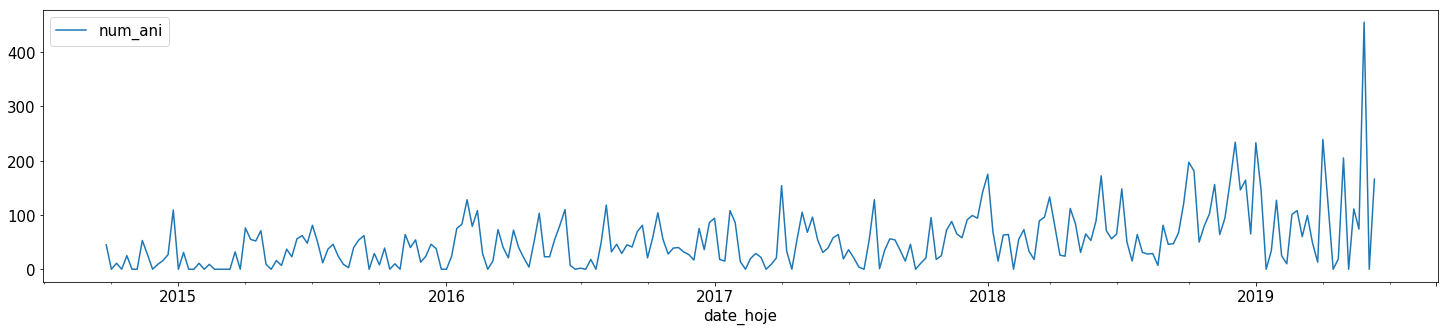

In [217]:
semana = serie_temp_ling.resample('W').sum().plot(
figsize=(25, 5)
)

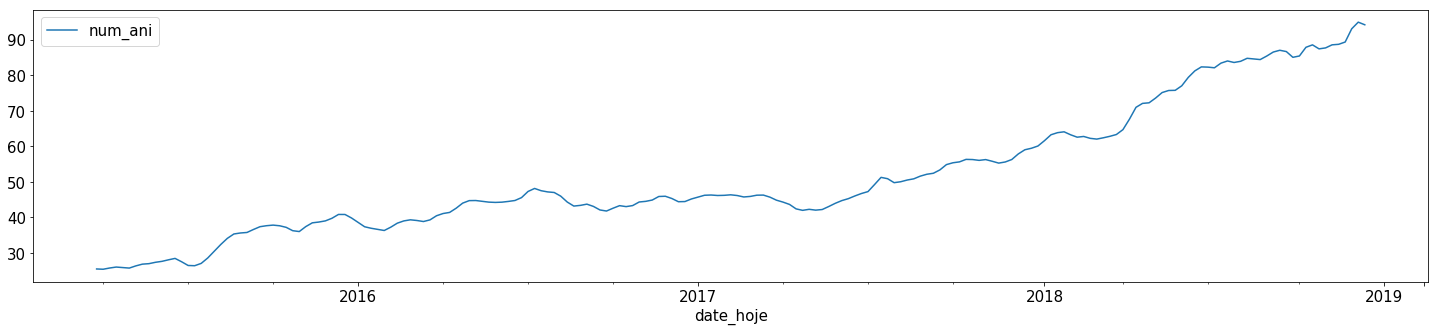

In [195]:
#Plotando minha tendência
semana = serie_temp_ling.resample('W').sum()
dec = seasonal_decompose(semana)
dec.trend.plot(
        figsize=(25, 5)
)

In [196]:
# dec.seasonal.plot(
#         figsize=(25, 5)
# )

In [197]:
# dec.resid.plot(
#         figsize=(25, 5)
# )

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

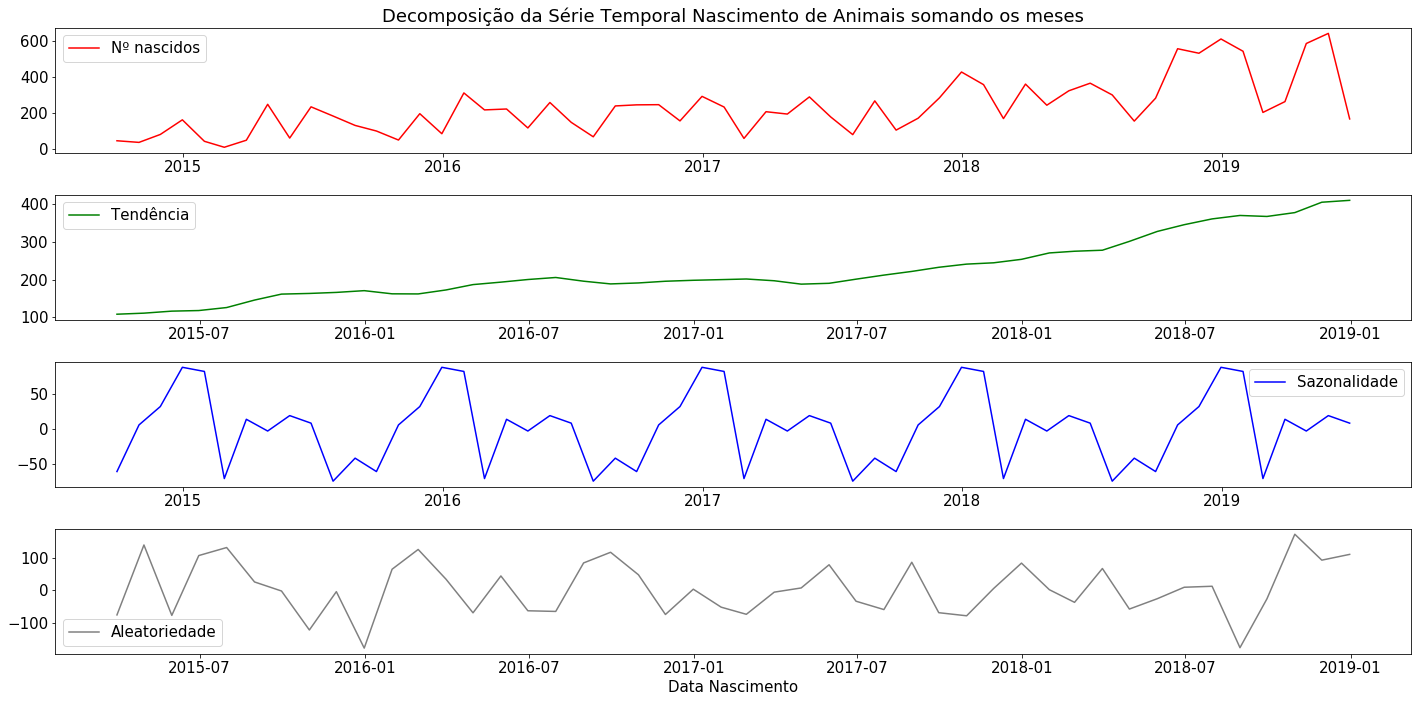

In [198]:
#1) Série temporal somando o numero de animais de todos os meses por ano

tempo_mes = serie_temp_ling.resample('M').sum().dropna()  #pegando minha série e pela função .resample() somando todos os meses entre os anos e .dropna()tirando valores NA
decom = seasonal_decompose(tempo_mes, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.figure(figsize=(20, 10))

plt.subplot(4, 1, 1)
plt.plot(tempo_mes, label = 'Nº nascidos', color='red')
plt.title('Decomposição da Série Temporal Nascimento de Animais somando os meses') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()

In [199]:
#Salvando minha DataFrame em csv para exportar e trabalhar em outro arquivo.

tempo_mes.to_csv('../tabelas_test/test_tempo_mes.csv')

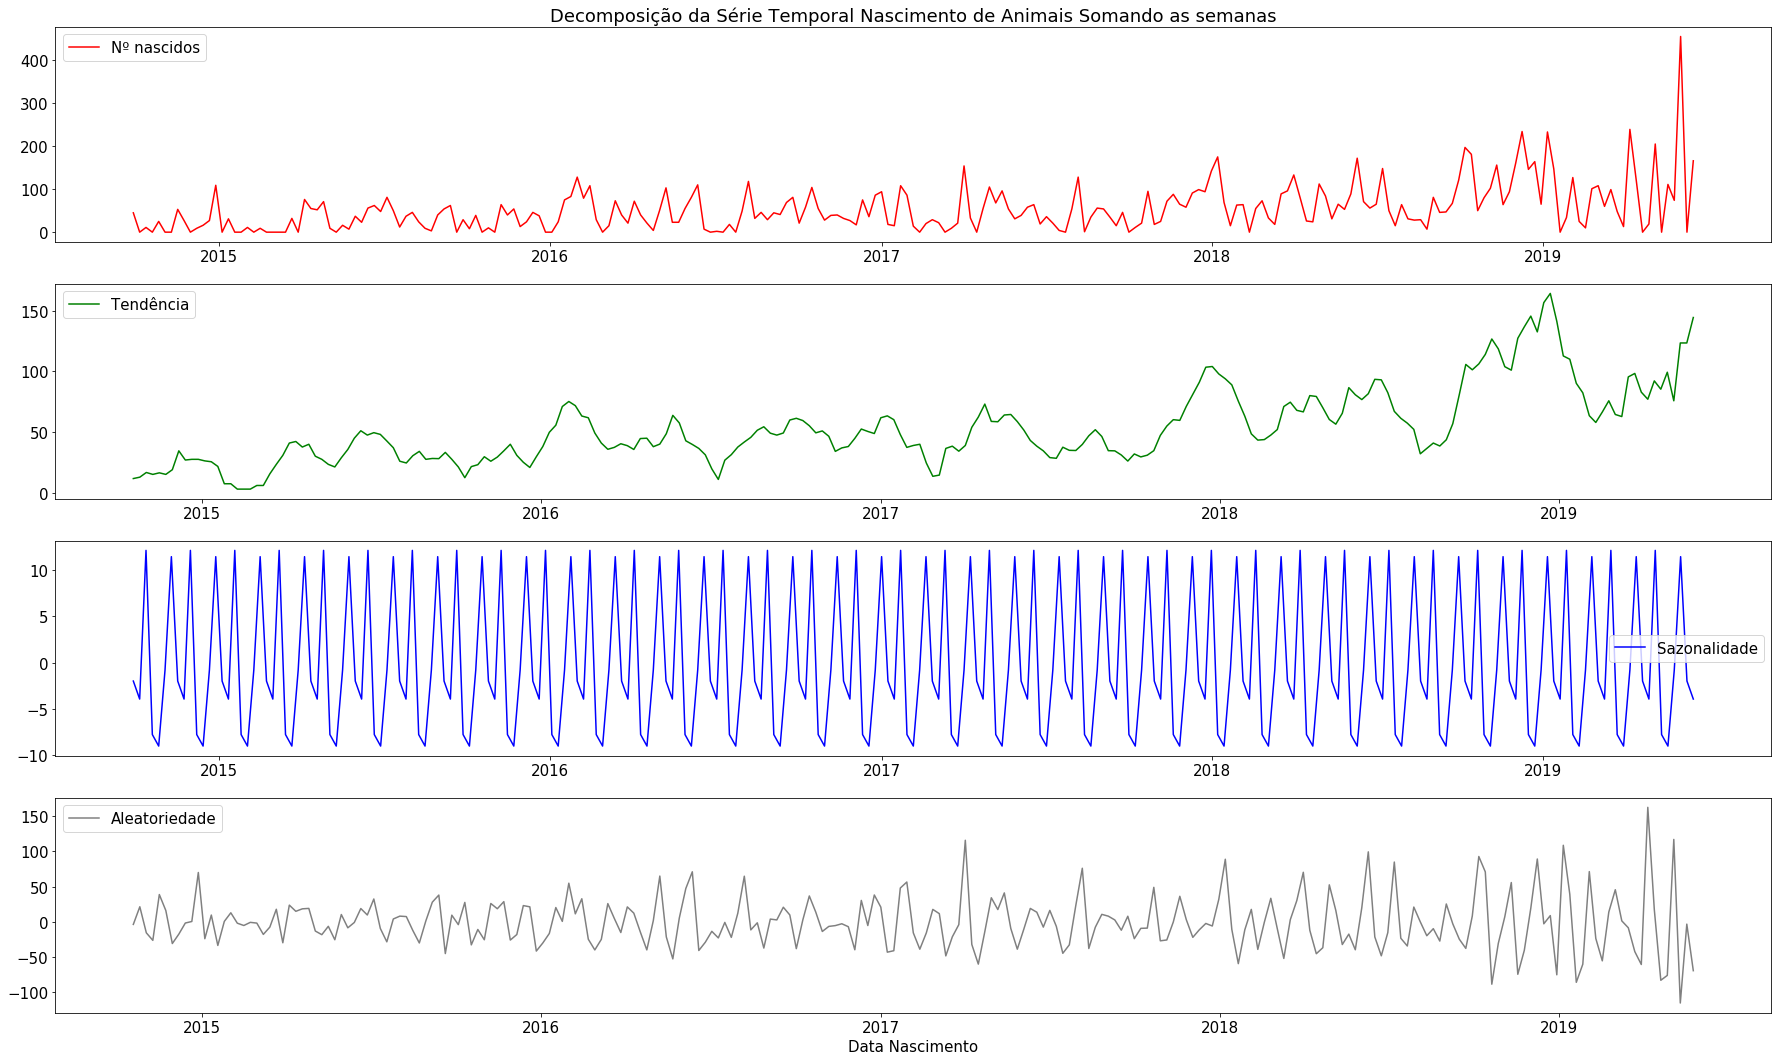

In [200]:
#2) Série temporal somando o numero de animais de todas as semanas por ano
tempo_semana = serie_temp_ling.resample('W').sum().dropna()
decom = seasonal_decompose(tempo_semana, freq=7)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_semana, label = 'Nº nascidos', color='red')
plt.title('Decomposição da Série Temporal Nascimento de Animais Somando as semanas') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()

In [201]:
tempo_semana.to_csv('../tabelas_test/test_tempo_semana.csv')

In [202]:
# #testando a média móvel na minha DataFrame semana que contém os valores somados por mês / ano
# tempo_semana.rolling(2).sum().plot(
# figsize=(25, 5), label = 'Média móvel', color = 'red')
# plt.legend(loc ='best')



In [203]:
#testando a média móvel na minha DataFrame semana que contém os valores somados por mês / ano
# tempo_.rolling(2).sum().plot(
# figsize=(25, 5), label = 'Média móvel', color = 'red')
# plt.legend(loc ='best')


GRUPO ISOGÊNICO

In [204]:
#Nova DataFrame filtranso apenas as linhagens isogênicas a partir da serie_temp_ling

ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129']

serie_lings_i = serie_temp_ling[serie_temp_ling['ling'].isin(ling_iso)]
serie_lings_i.head()

,ling,num_ani
date_hoje,,
2014-10-21 12:43:17,129/SV-E,8
2014-10-21 12:43:17,129/SV-E,2
2014-10-21 12:43:17,129/SV-E,4
2014-10-21 13:02:34,S129KO,5
2014-10-24 15:47:48,S129KO,6


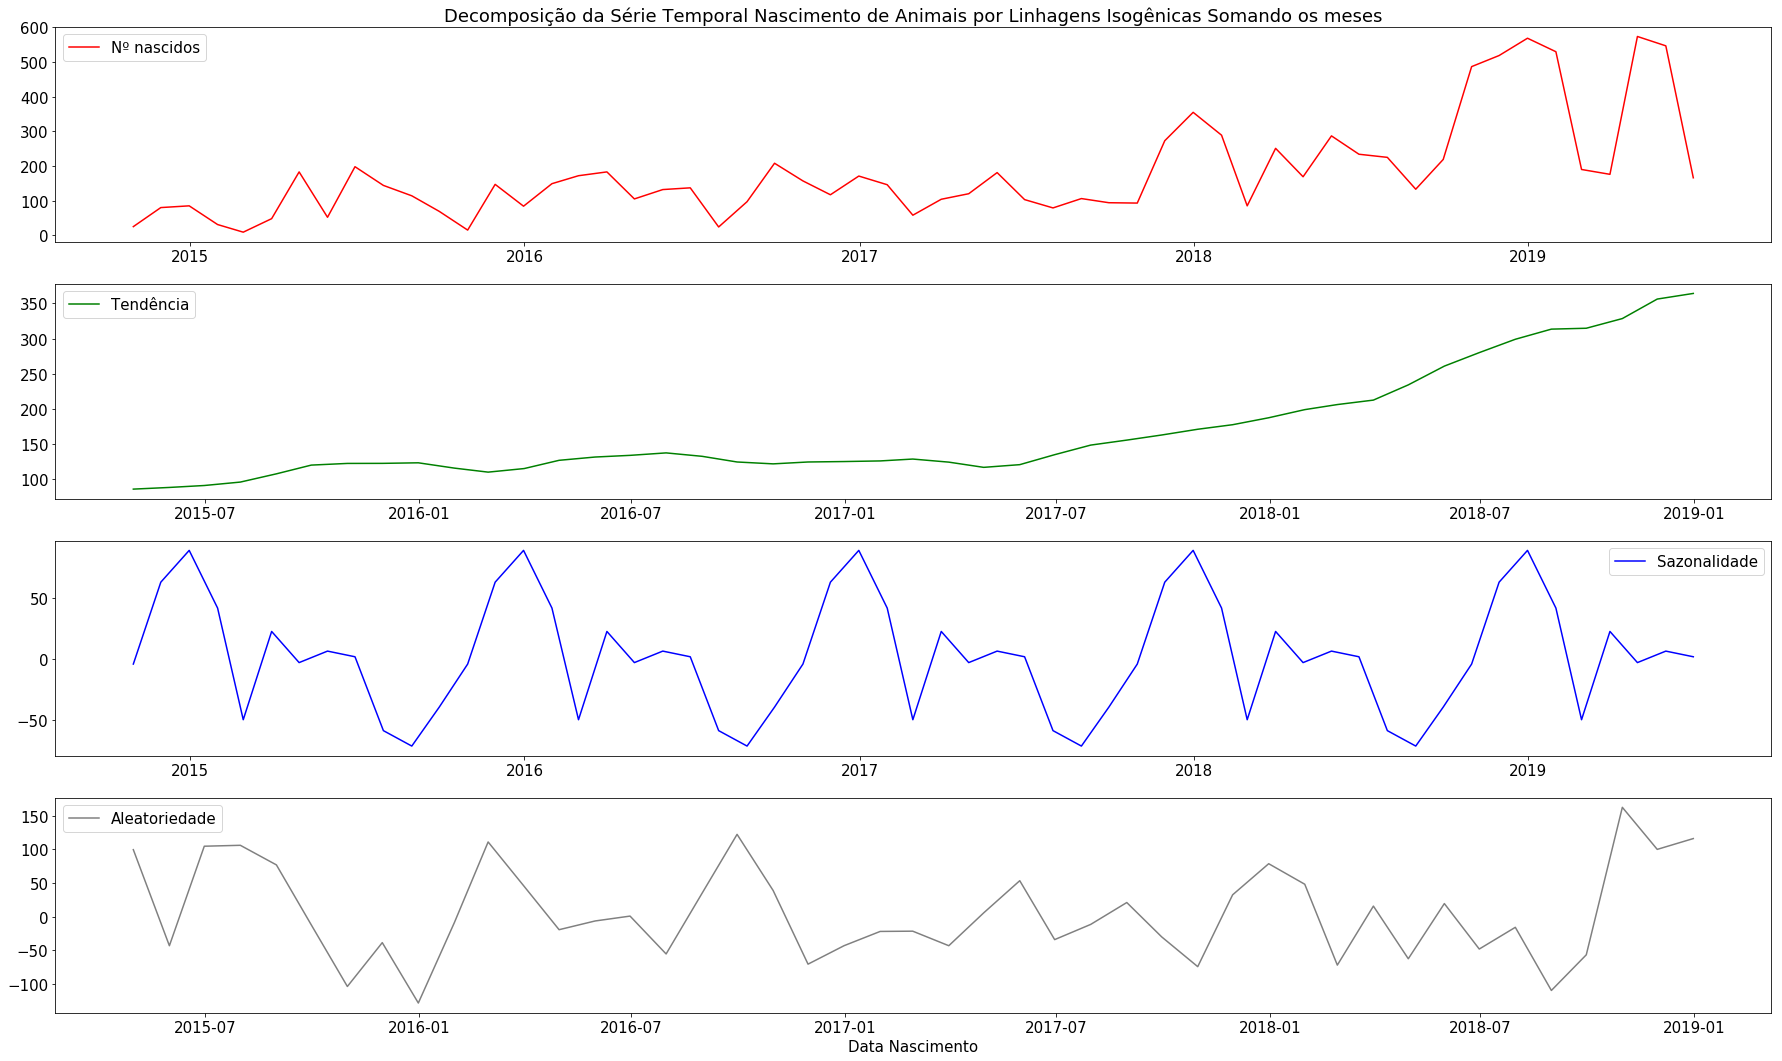

In [205]:
#3) Série temporal somando o numero de animais por linhagem isogênicas de todos os meses por ano
tempo_mes_iso = serie_lings_i.resample('M').sum().dropna()
decom = seasonal_decompose(tempo_mes_iso, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_mes_iso, label = 'Nº nascidos', color='red')
plt.title('Decomposição da Série Temporal Nascimento de Animais por Linhagens Isogênicas Somando os meses') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()

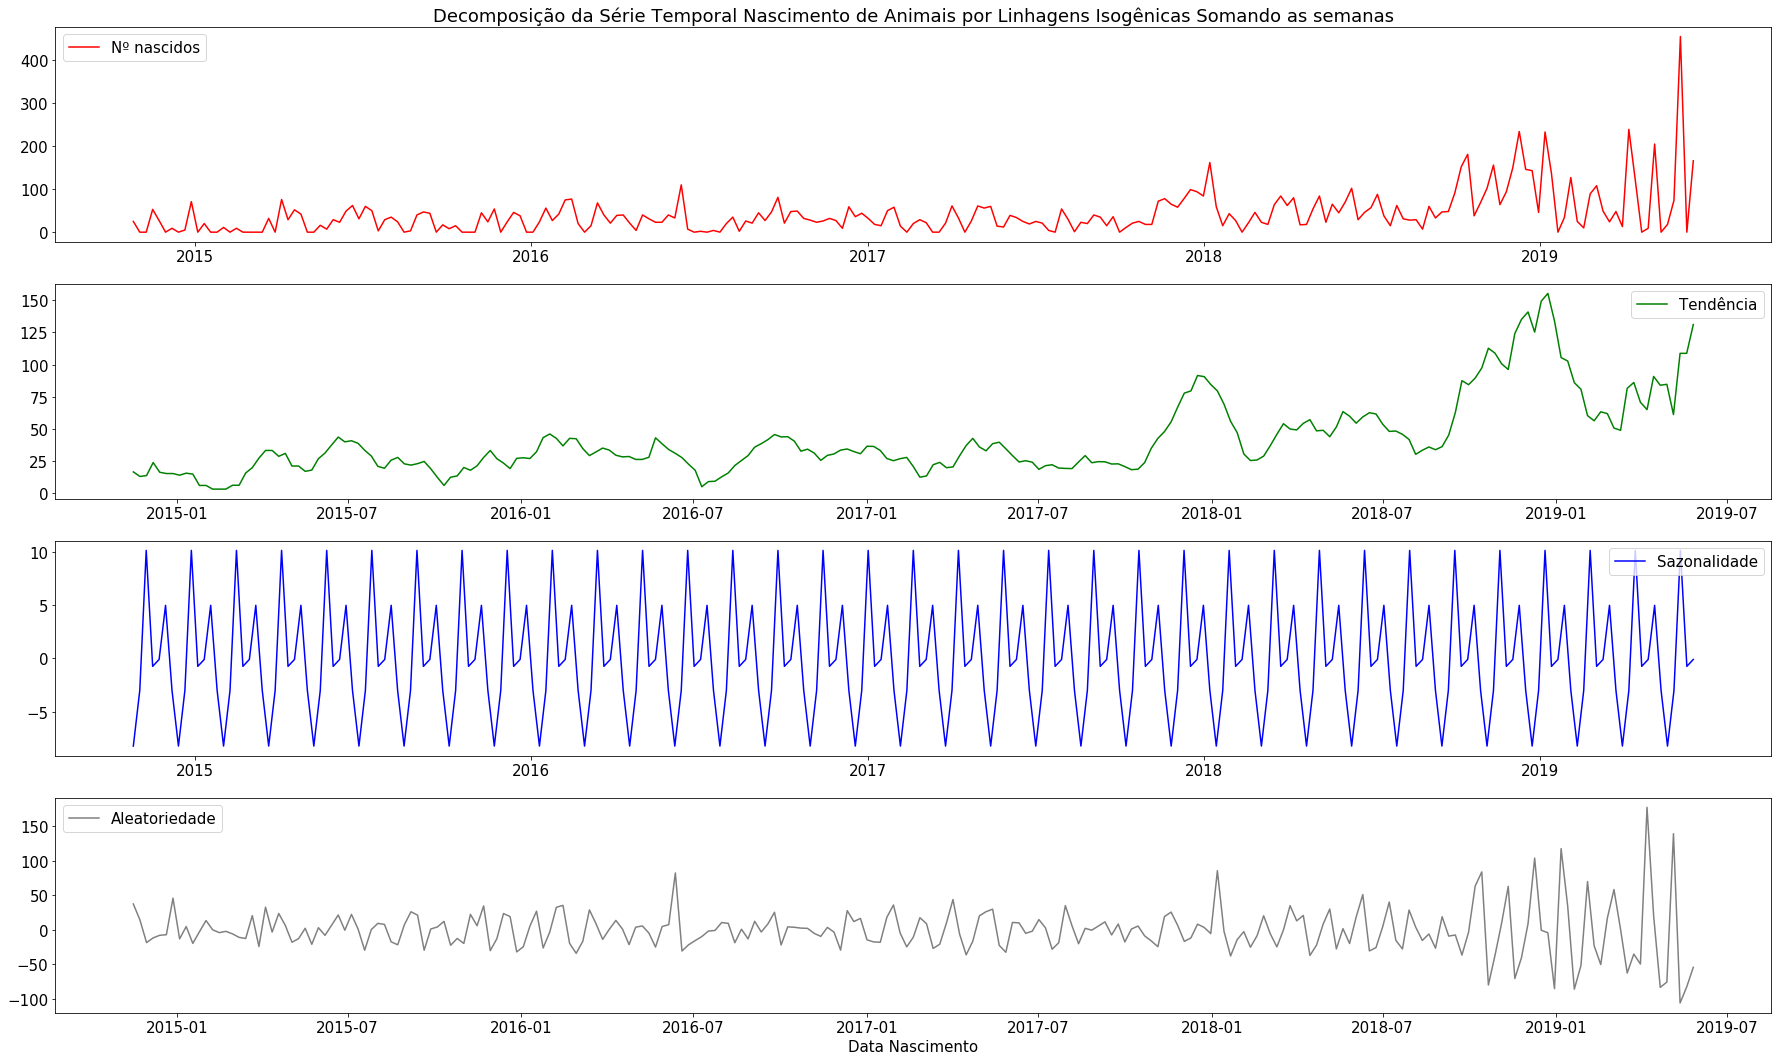

In [206]:
# 4) Série temporal somando o numero de animais por linhagem isogênica de todas as semanas por ano

tempo_semana_iso = serie_lings_i.resample('W').sum().dropna()
decom = seasonal_decompose(tempo_semana_iso, freq=7)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_semana_iso, label = 'Nº nascidos', color='red')
plt.title('Decomposição da Série Temporal Nascimento de Animais por Linhagens Isogênicas Somando as semanas') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()

GRUPO HETEROGÊNICO

In [207]:
ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 B','Swiss-2 C','Swiss-2 D','Swiss-2 E']
serie_lings_h = serie_temp_ling[serie_temp_ling['ling'].isin(ling_het)]
serie_lings_h.head()

,ling,num_ani
date_hoje,,
2014-09-23 17:40:33,Swiss-1 E,5
2014-09-23 17:40:33,Swiss-1 E,10
2014-09-23 17:40:47,Swiss-1 E,10
2014-09-23 18:13:24,Swiss-1 D,10
2014-09-23 18:13:24,Swiss-1 B,10


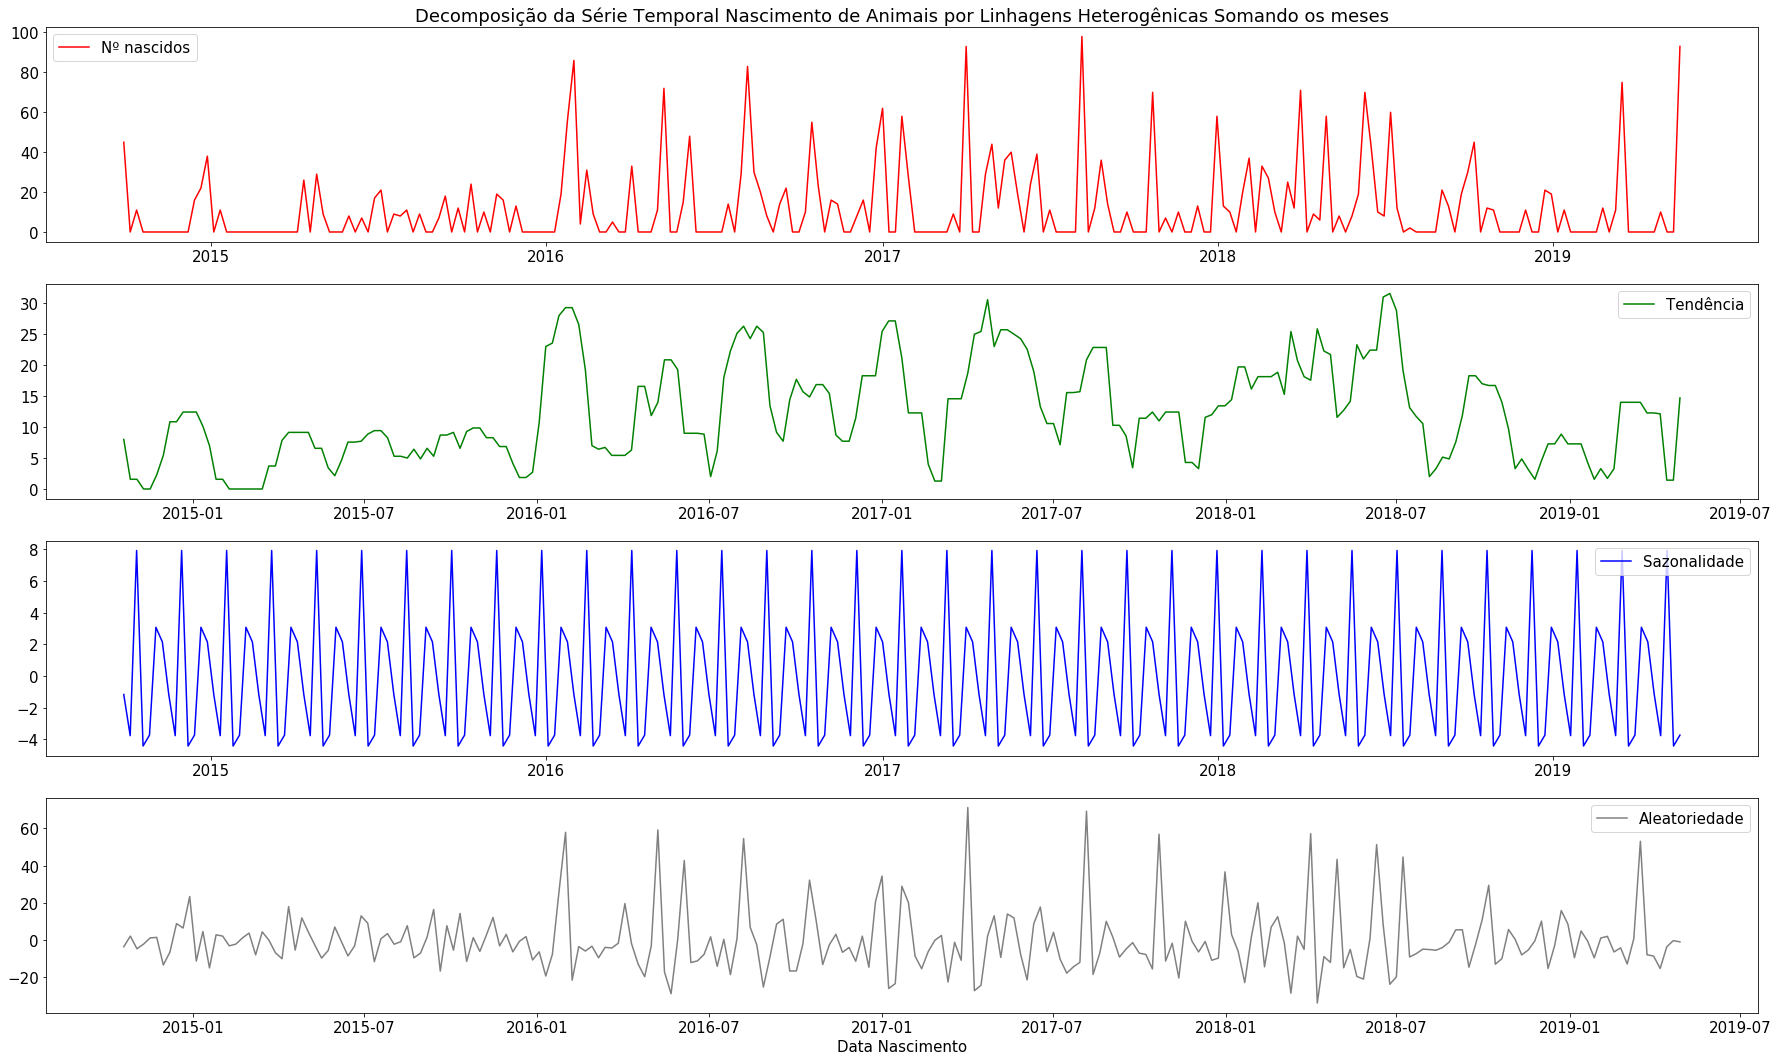

In [208]:
# 5) Série temporal somando o numero de animais por linhagem heterogênica de todos os meses por ano
tempo_mes_het = serie_lings_h.resample('W').sum().dropna()
decom = seasonal_decompose(tempo_mes_het, freq=7)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_mes_het, label = 'Nº nascidos', color='red')
plt.title('Decomposição da Série Temporal Nascimento de Animais por Linhagens Heterogênicas Somando os meses') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()

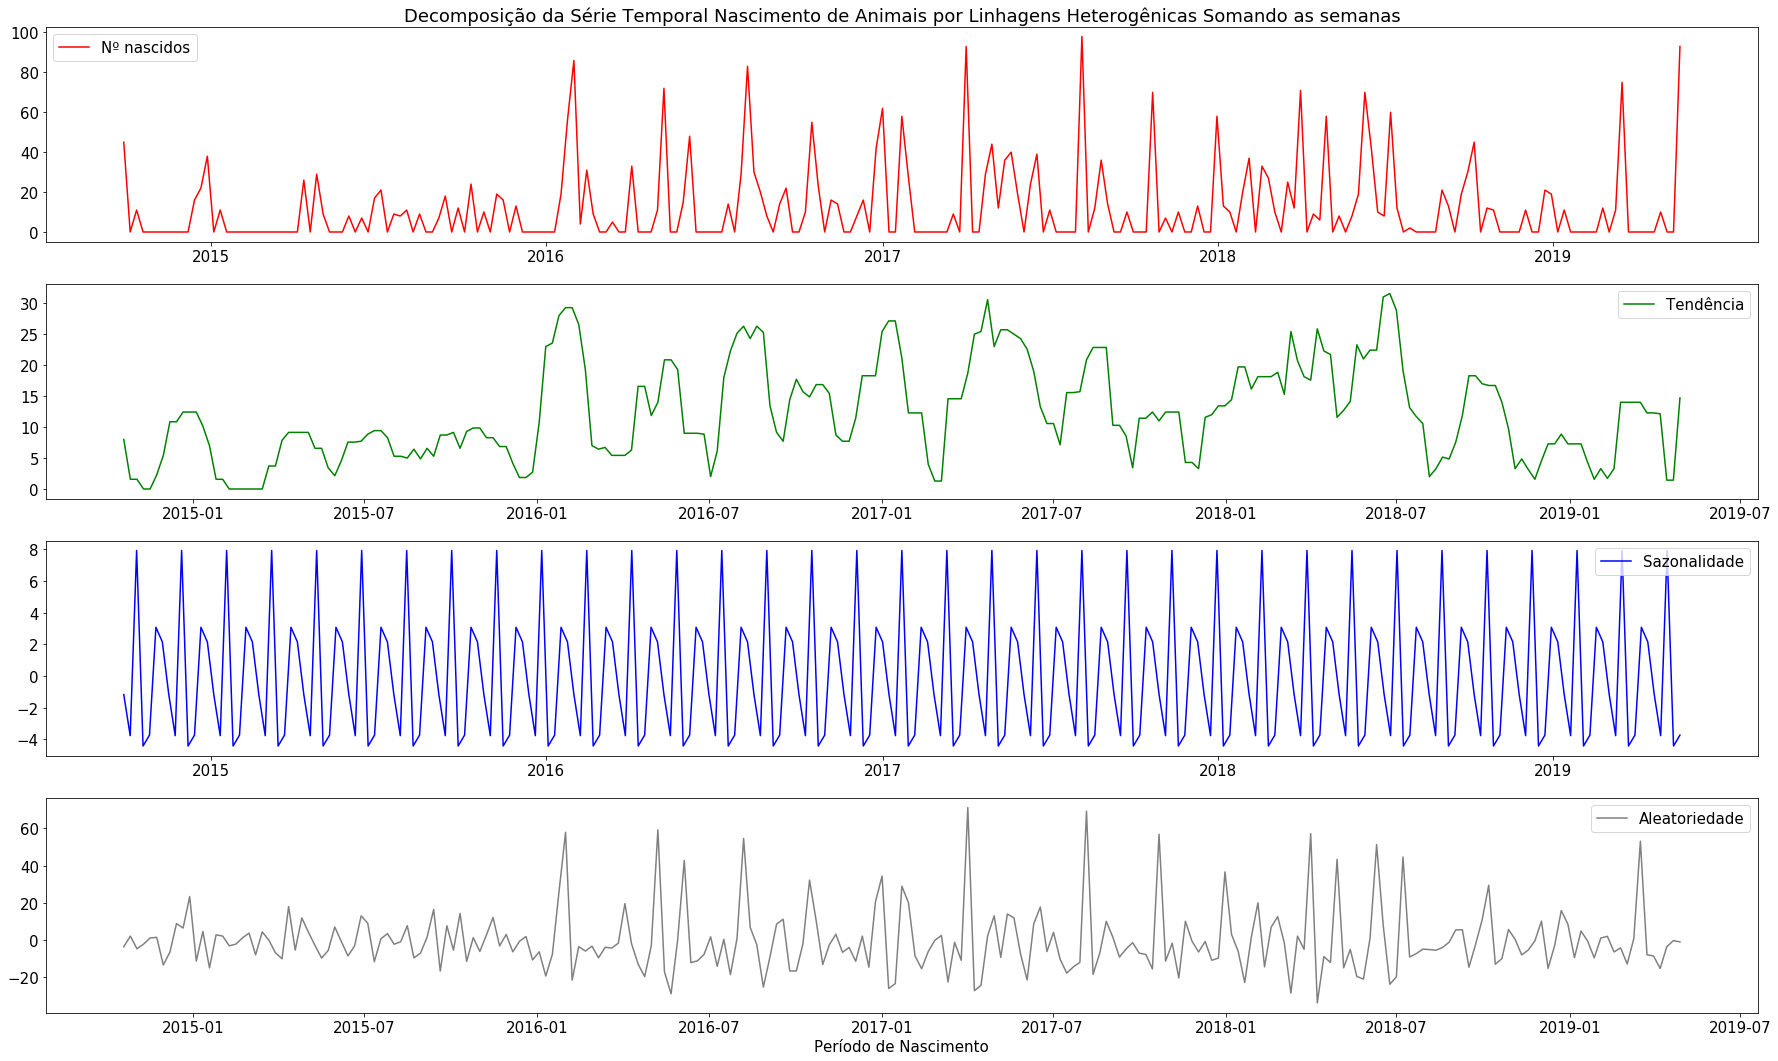

In [209]:
# 6) Série temporal somando o numero de animais por linhagem heterogênica de todas as semanas por ano
tempo_semana_het = serie_lings_h.resample('W').sum().dropna()
decom = seasonal_decompose(tempo_semana_het, freq=7)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_semana_het, label = 'Nº nascidos', color='red')
plt.title('Decomposição da Série Temporal Nascimento de Animais por Linhagens Heterogênicas Somando as semanas') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Período de Nascimento')
plt.tight_layout()

In [286]:
from statsmodels.tsa.arima_model import ARIMA

In [287]:
serie_temp_ling.index.max()

Timestamp('2019-06-14 14:04:31')

In [288]:
#Testando a função .resample() que soma todos os animais por meses durante cada ano.
ts = serie_temp_ling.resample('A').sum()
ts = ts['num_ani']
ts.head()

date_hoje
2014-12-31     322
2015-12-31    1378
2016-12-31    2507
2017-12-31    2482
2018-12-31    4239
Freq: A-DEC, Name: num_ani, dtype: int64

In [289]:
teste = ARIMA(ts, order=(2, 1, 2)) # dentro de order temos (p, q, d) p n° de termos auto regressivos, q n° da média móvel (muveing average), d n° de diferenças ñ sazonais
modelo_tr = teste.fit()
modelo_tr.summary()

ValueError: Insufficient degrees of freedom to estimate

Text(0, 0.5, 'Número de Animais')

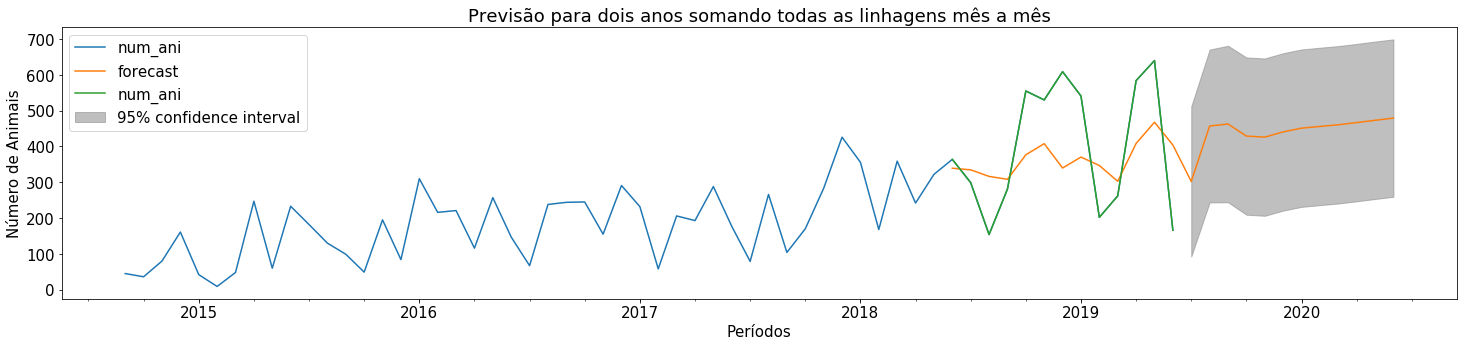

In [280]:
#previsão somando todas as linhagens mês a mês

prev = modelo_tr.forecast(steps=12)
plt.figure(figsize=(25, 5))
modelo_tr.plot_predict('2018-06', '2020-06',
                       ax = ts.plot(),
                       plot_insample=True
                      )
plt.title('Previsão para dois anos somando todas as linhagens mês a mês')

plt.xlabel('Períodos') #definindo nome do eixo X
plt.ylabel('Número de Animais') #definindo nome do eixo Y

In [250]:
prev[0]

array([302.32663584, 457.16208501, 462.79677116, 429.0871857 ,
       426.10975888, 440.71591395, 451.17791707, 455.99315609,
       460.61184142, 466.69169485, 473.16093815, 479.33015291])

GRUPO ISOGÊNICO

In [269]:
ts_iso = serie_lings_i.resample('M').sum()
ts_iso = ts_iso['num_ani']
ts_iso.head()

date_hoje
2014-10-31    25
2014-11-30    80
2014-12-31    85
2015-01-31    31
2015-02-28     9
Freq: M, Name: num_ani, dtype: int64

In [270]:
teste_iso = ARIMA(ts_iso, order=(2, 1, 2)) # dentro de order temos (p, q, d) p n° de termos auto regressivos, q n° da média móvel (muveing average), d n° de diferenças ñ sazonais
modelo_iso = teste_iso.fit()
modelo_iso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.num_ani   No. Observations:                   56
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -336.191
Method:                       css-mle   S.D. of innovations             96.645
Date:                Tue, 18 Feb 2020   AIC                            684.381
Time:                        14:49:46   BIC                            696.533
Sample:                    11-30-2014   HQIC                           689.093
                         - 06-30-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.8485      2.374      2.464      0.017       1.196      10.501
ar.L1.D.num_ani     0.2614      0.307      0.850      0.399      -0.341       0.864
ar.L2.D.num_ani    -0.3569      0.200     -1.784      0.080      -0.749       0.035
ma.L1.D.num_ani    -0.6889      0.304     -2.266      0.028      -1.285      -0.093
ma.L2.D.num_ani    -0.1321      0.293     -0.451      0.654      -0.706       0.442
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3661           -1.6334j            1.6739           -0.2149
AR.2            0.3661           +1.6334j            1.6739            0.2149
MA.1            1.1832           +0.0000j            1.1832            0.0000
MA.2           -6.3982           +0.0000j            6.3982            0.5000
-----------------------------------------------------------------------------
"""

Text(0, 0.5, 'Número de Animais')

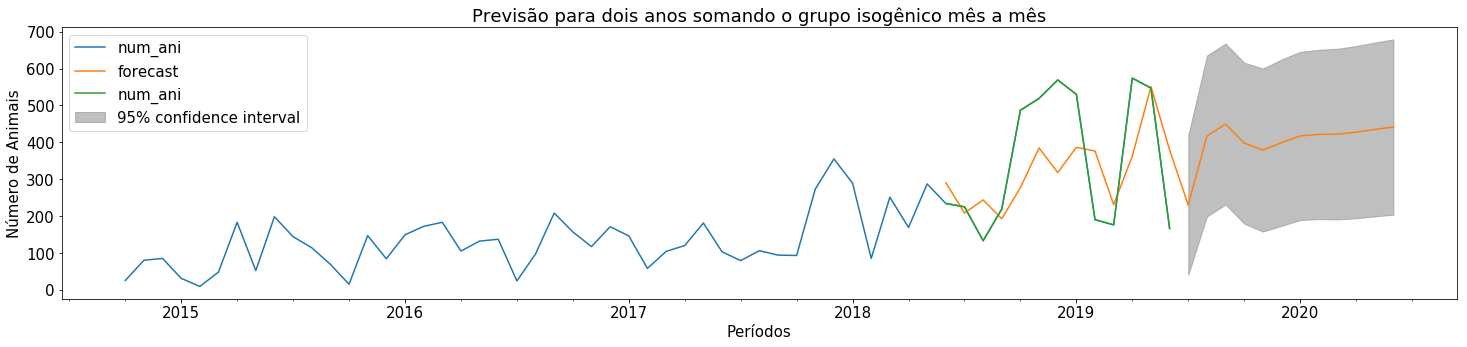

In [281]:
#previsão somando grupo isogênico mês a mês

prev = modelo_iso.forecast(steps=12)

plt.figure(figsize=(25, 5))
modelo_iso.plot_predict('2018-06', '2020-06',
                       ax = ts_iso.plot(),
                       plot_insample=True
                      )
plt.title('Previsão para dois anos somando o grupo isogênico mês a mês')
plt.xlabel('Períodos') #definindo nome do eixo X
plt.ylabel('Número de Animais') #definindo nome do eixo Y

GRUPO HETEROGÊNICO

In [283]:
ts_het = serie_lings_h.resample('M').sum()
ts_het = ts_het['num_ani']
ts_het.head()

date_hoje
2014-09-30    45
2014-10-31    11
2014-11-30     0
2014-12-31    76
2015-01-31    11
Freq: M, Name: num_ani, dtype: int64

In [284]:
teste_het = ARIMA(ts_het, order=(2, 1, 2)) # dentro de order temos (p, q, d) p n° de termos auto regressivos, q n° da média móvel (muveing average), d n° de diferenças ñ sazonais
modelo_het = teste_het.fit()
modelo_het.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.num_ani   No. Observations:                   56
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -286.767
Method:                       css-mle   S.D. of innovations             39.859
Date:                Tue, 18 Feb 2020   AIC                            585.534
Time:                        15:12:46   BIC                            597.686
Sample:                    10-31-2014   HQIC                           590.245
                         - 05-31-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4085      0.971      0.421      0.676      -1.494       2.311
ar.L1.D.num_ani    -0.3784      0.417     -0.908      0.368      -1.195       0.438
ar.L2.D.num_ani    -0.1630      0.226     -0.721      0.474      -0.606       0.280
ma.L1.D.num_ani    -0.8916      0.410     -2.173      0.034      -1.696      -0.087
ma.L2.D.num_ani     0.1589      0.341      0.466      0.643      -0.510       0.828
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1605           -2.1880j            2.4767           -0.3276
AR.2           -1.1605           +2.1880j            2.4767            0.3276
MA.1            1.5494           +0.0000j            1.5494            0.0000
MA.2            4.0625           +0.0000j            4.0625            0.0000
-----------------------------------------------------------------------------
"""

Text(0, 0.5, 'Número de Animais')

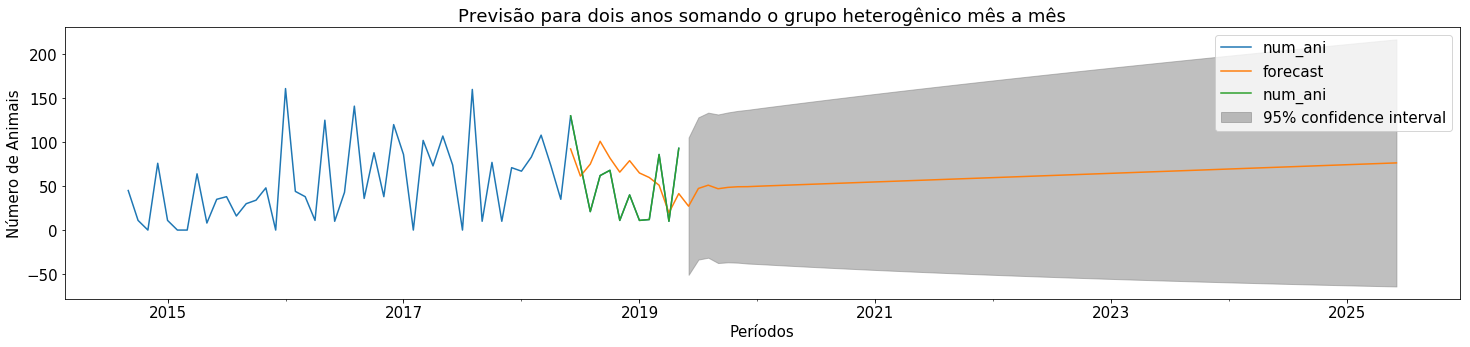

In [290]:
#previsão somando grupo heterogênico mês a mês

prev = modelo_het.forecast(steps=12)

plt.figure(figsize=(25, 5))
modelo_het.plot_predict('2018-06', '2025-06',
                       ax = ts_het.plot(),
                       plot_insample=True
                      )
plt.title('Previsão para dois anos somando o grupo heterogênico mês a mês')
plt.xlabel('Períodos') #definindo nome do eixo X
plt.ylabel('Número de Animais') #definindo nome do eixo Y